
Skewness of Numeric Columns:
Avg_Disbursement_Amount_Bureau                     : 31.589
Non_Agriculture_Income                             : 30.697
Target_Variable/Total Income                       : 25.280
 Land Holding Index source (Total Agri Area/ no of people) : 15.475
 Road density (Km/ SqKm)                           : 6.846
No_of_Active_Loan_In_Bureau                        : 3.110
K022-Total Geographical Area (in Hectares)-        : 2.859
K022-Net Agri area (in Ha)-                        : 2.858
Total_Land_For_Agriculture                         : 2.804
Perc_of_house_with_6plus_room                      : 2.554
perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms : 2.172
perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k : 2.104
R020-Seasonal Average Rainfall (mm)                : 1.892
R022-Seasonal Average Rainfall (mm)                : 1.627
mat_roof_Metal_GI_Asbestos_sheets                  : 1.570
Women_15_19_Mothers_or_Pregnant_at_time_of_survey  : 1

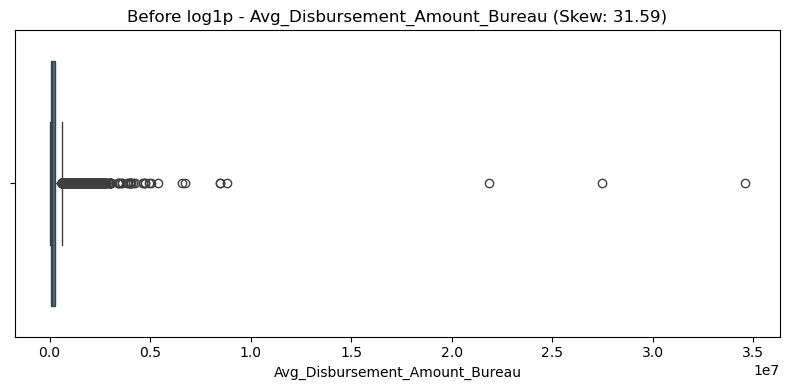

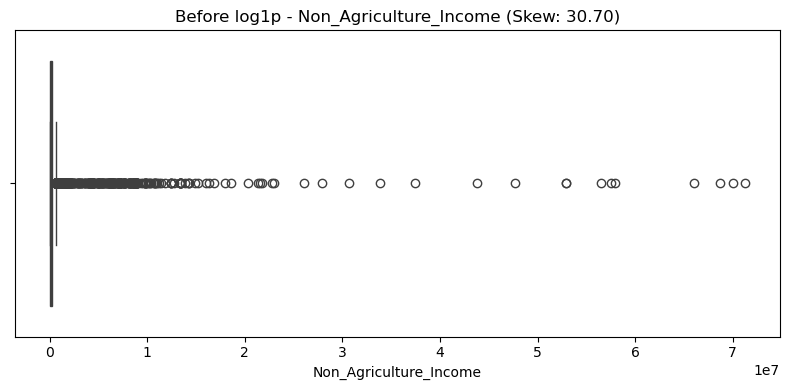

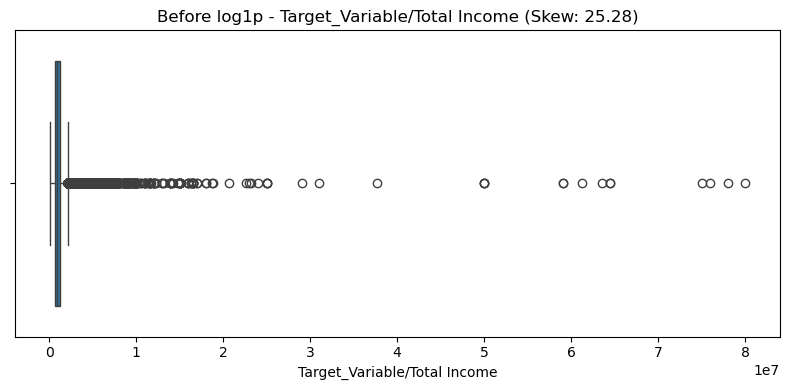

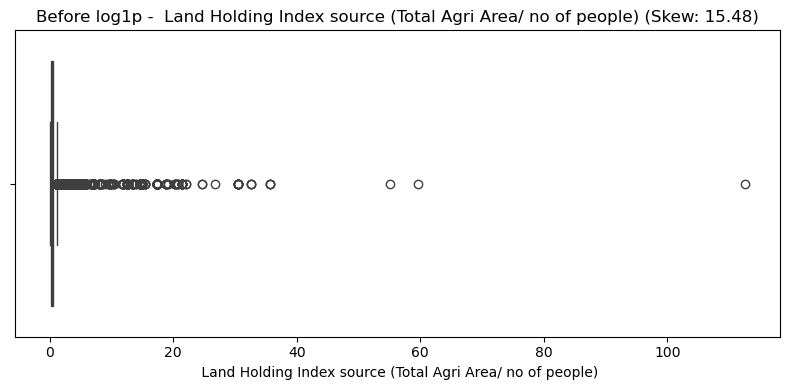

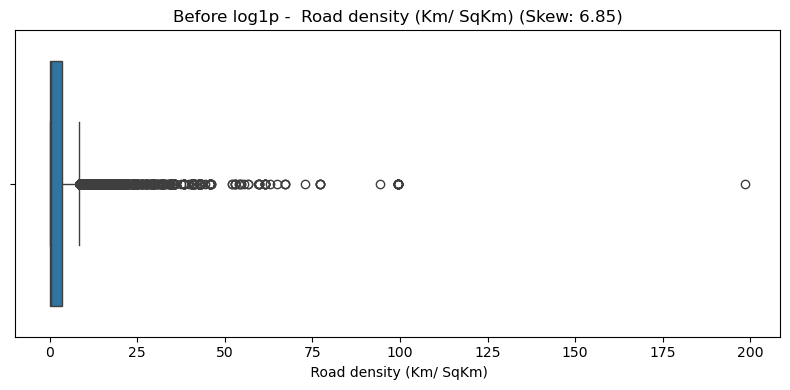

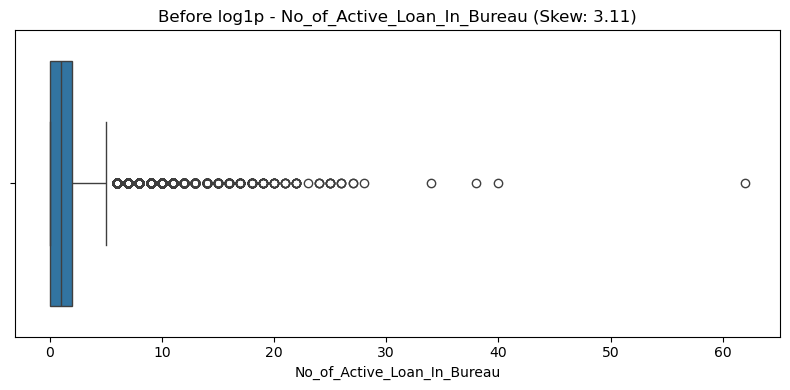

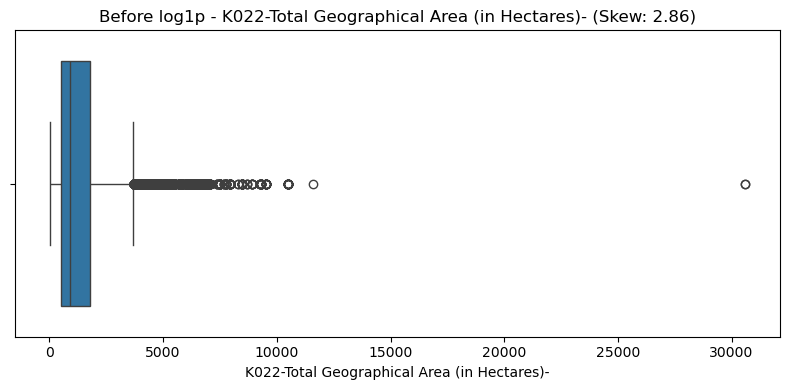

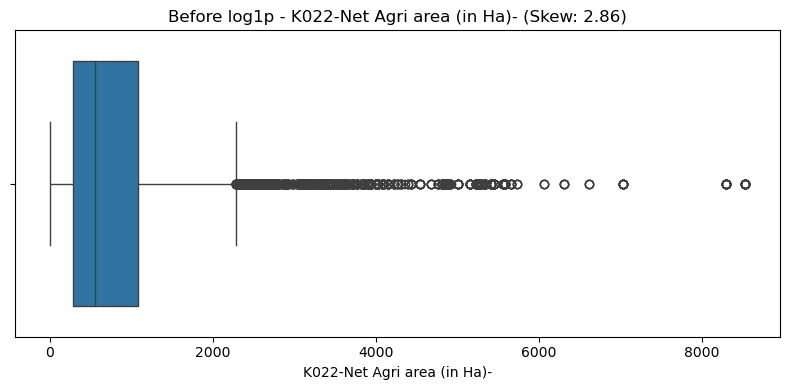

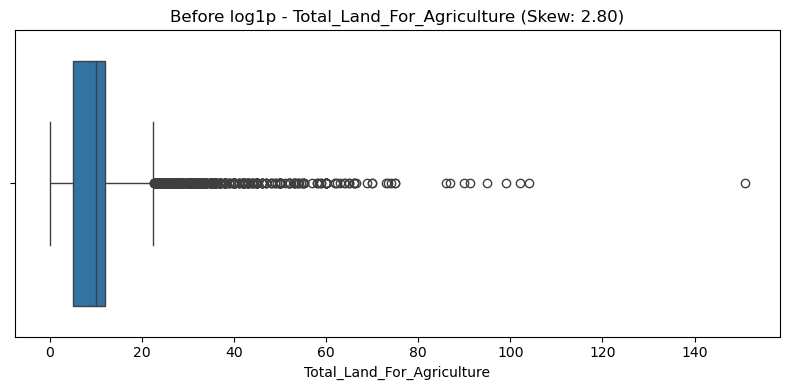

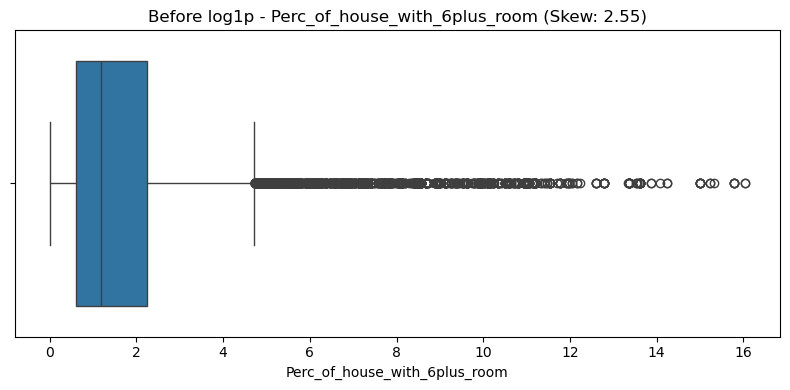

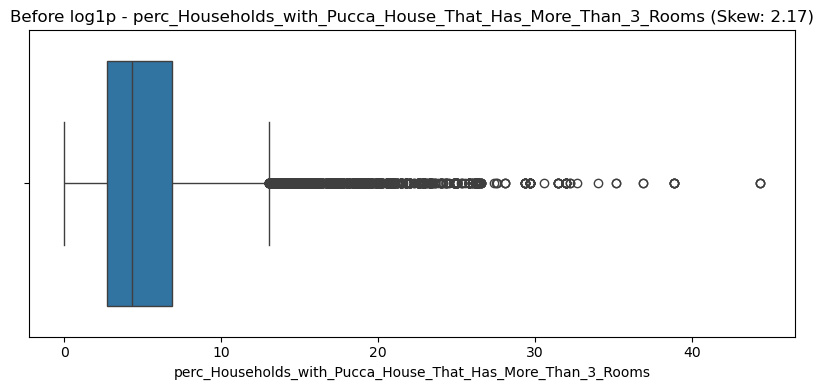

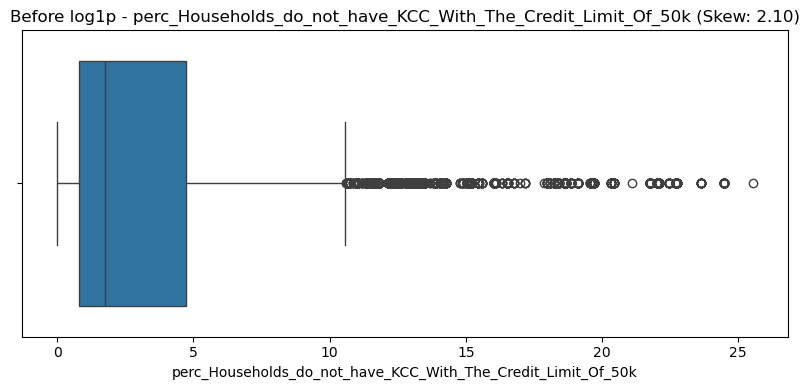

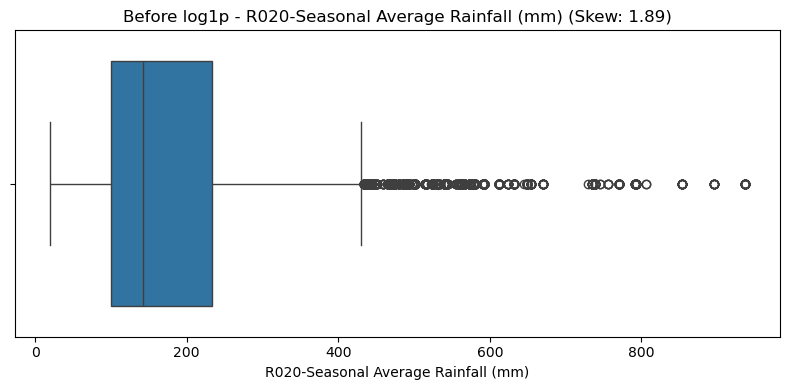

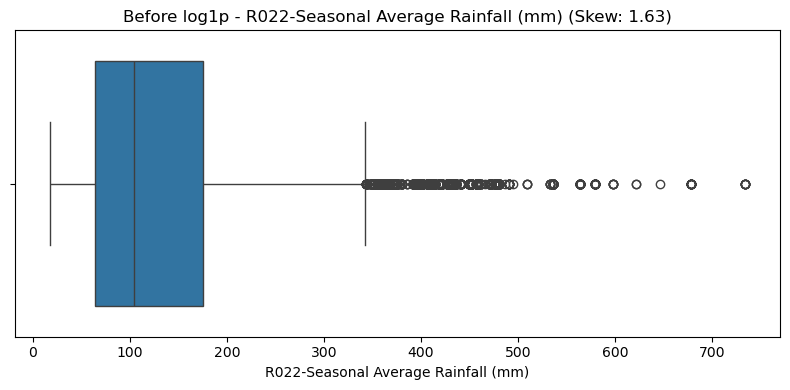

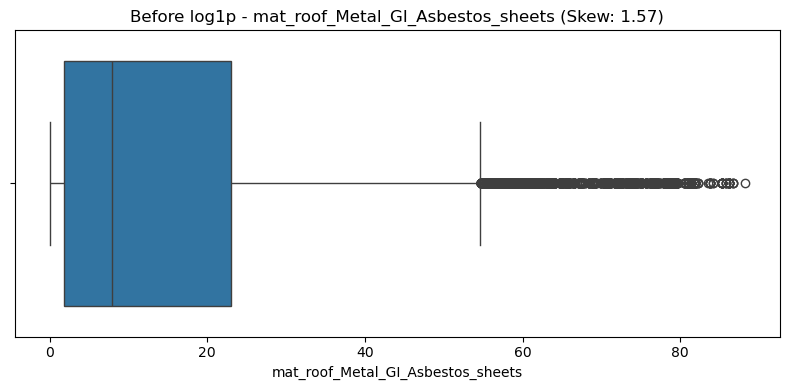

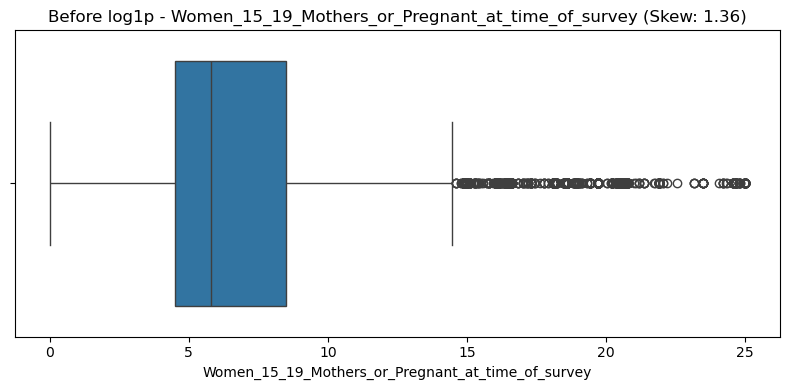

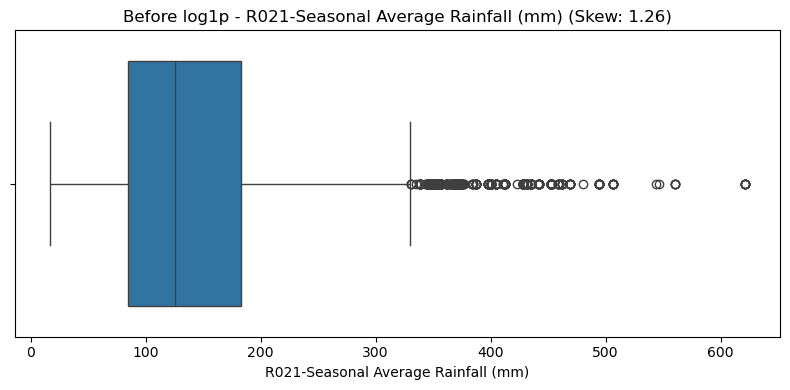

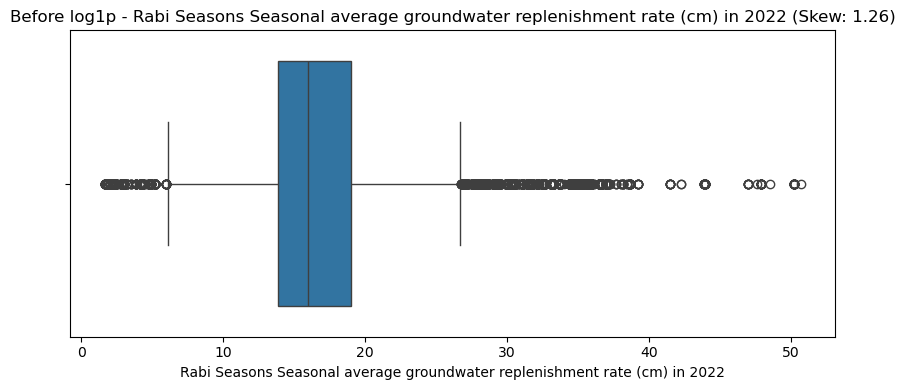

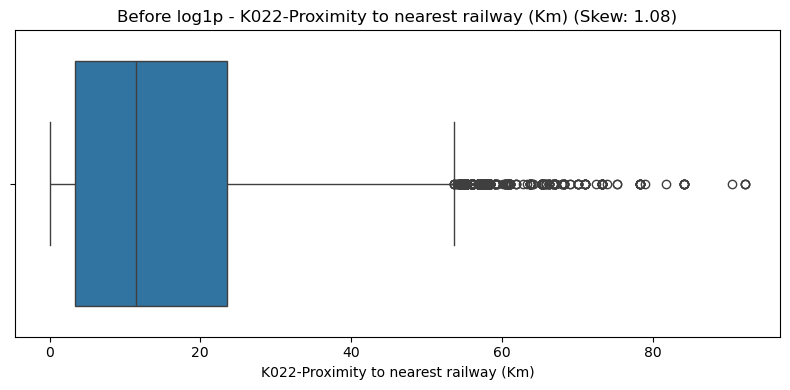

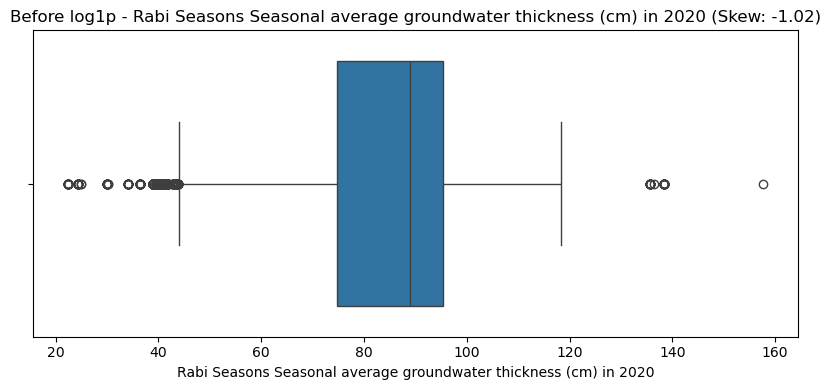

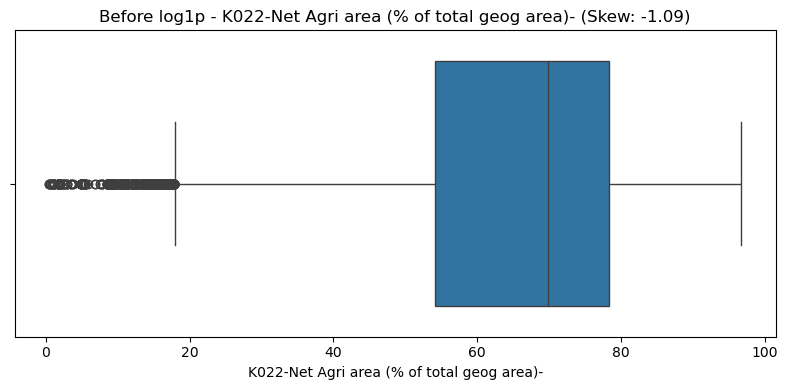

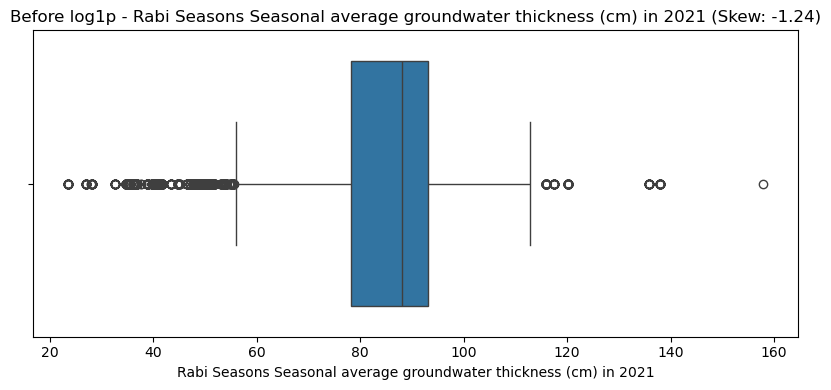

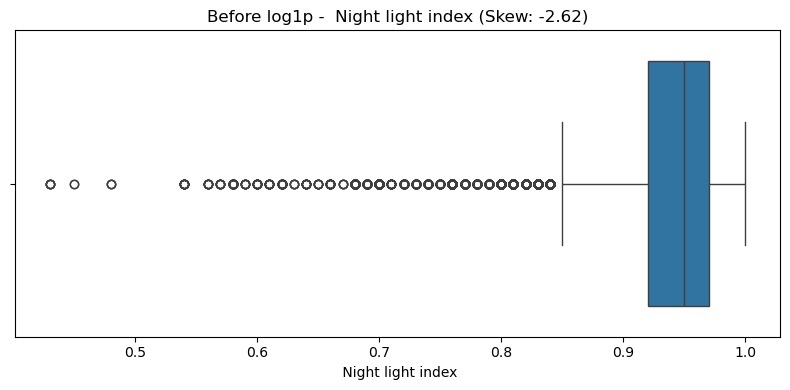

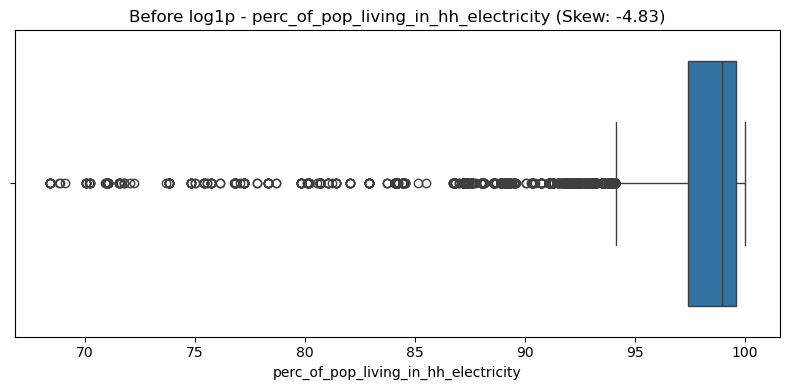


Skewness AFTER log1p transformation:
 Land Holding Index source (Total Agri Area/ no of people) : 3.192
Target_Variable/Total Income                       : 1.531
 Road density (Km/ SqKm)                           : 0.904
No_of_Active_Loan_In_Bureau                        : 0.728
Perc_of_house_with_6plus_room                      : 0.632
perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k : 0.616
perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms : 0.215
R022-Seasonal Average Rainfall (mm)                : 0.123
R020-Seasonal Average Rainfall (mm)                : 0.082
Total_Land_For_Agriculture                         : 0.064
mat_roof_Metal_GI_Asbestos_sheets                  : -0.004
R021-Seasonal Average Rainfall (mm)                : -0.250
K022-Total Geographical Area (in Hectares)-        : -0.261
Women_15_19_Mothers_or_Pregnant_at_time_of_survey  : -0.279
K022-Net Agri area (in Ha)-                        : -0.466
K022-Proximity to nearest railway (Km)       

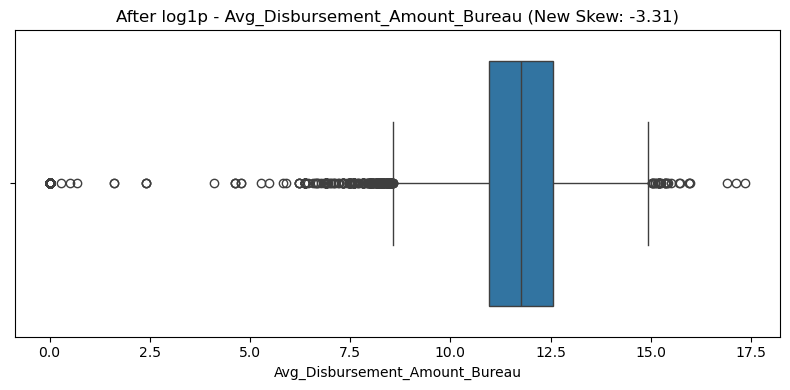

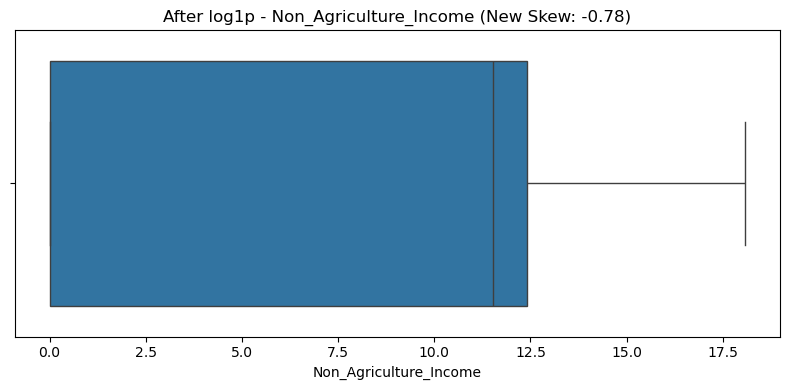

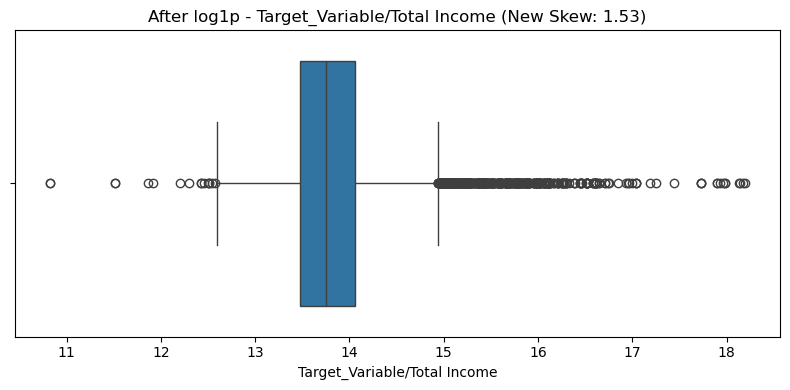

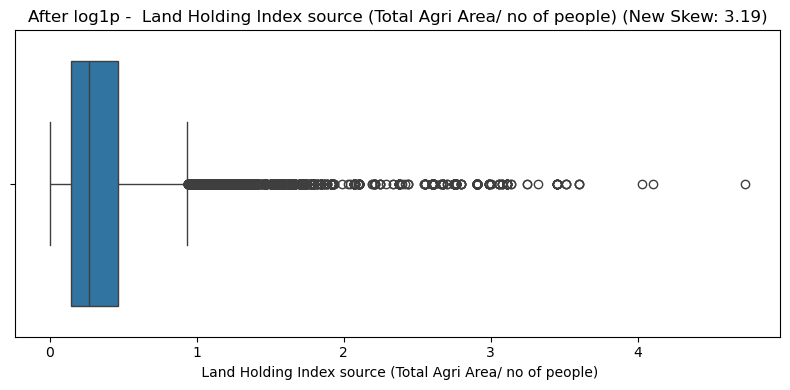

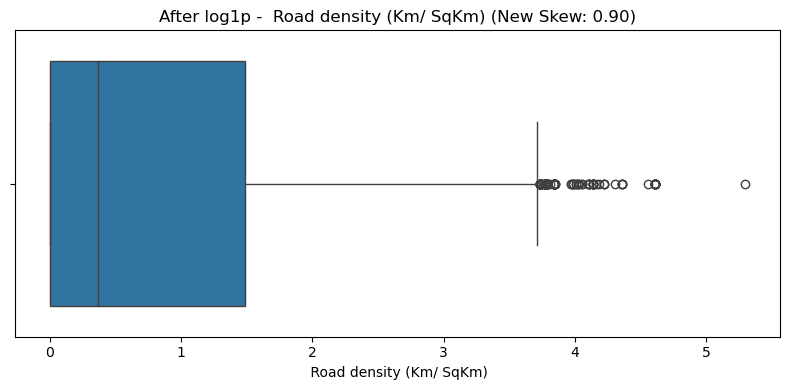

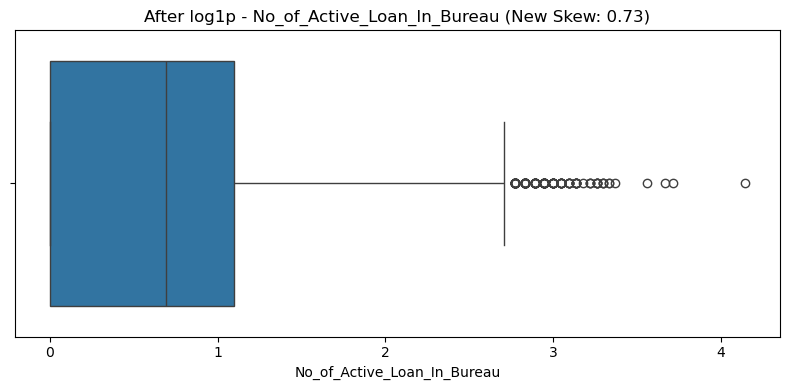

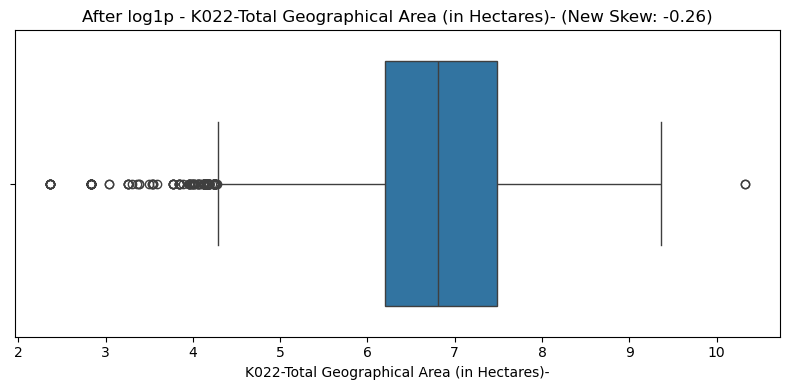

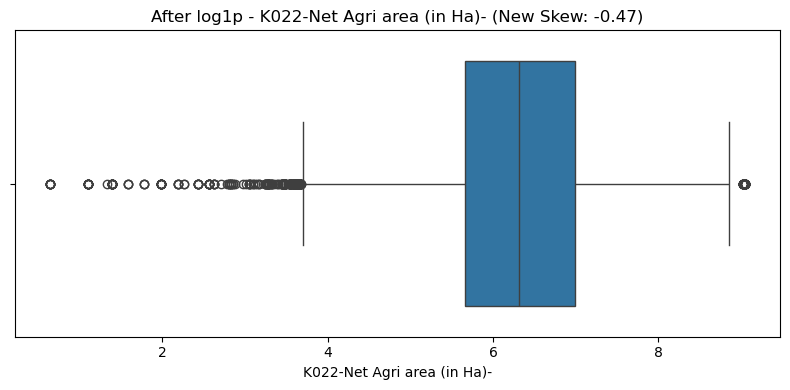

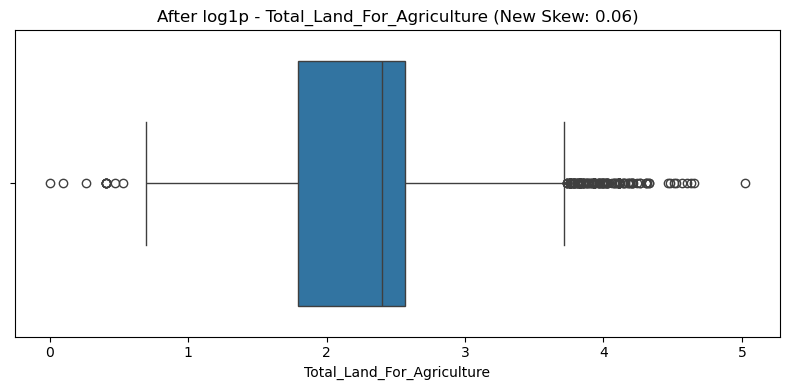

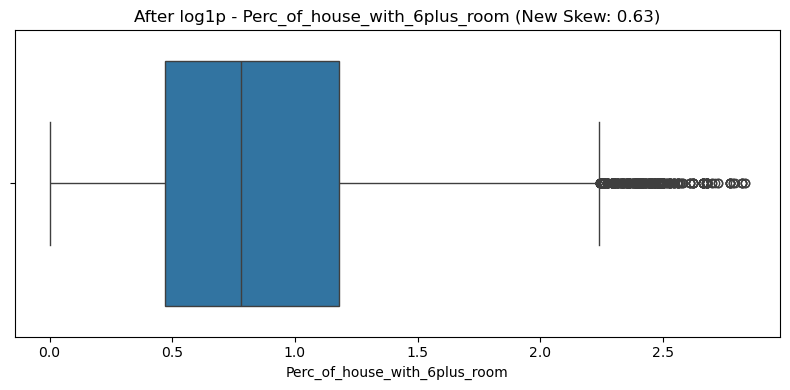

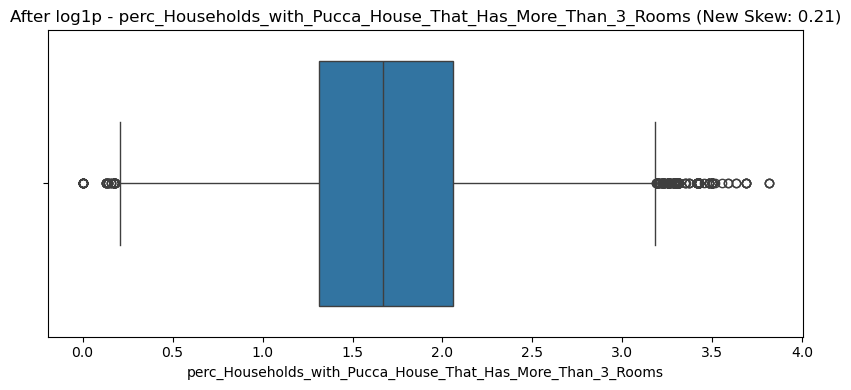

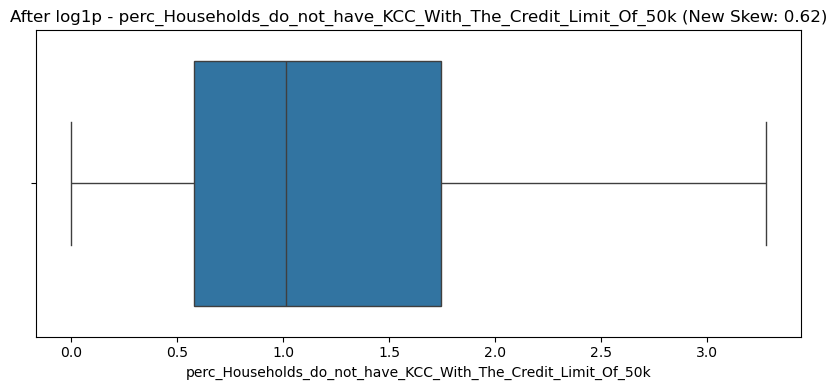

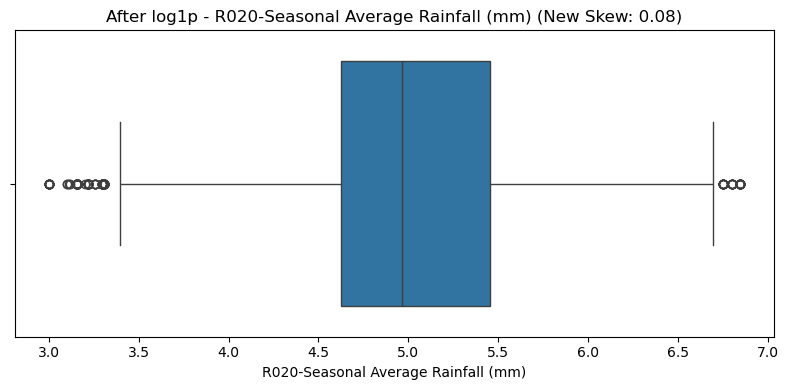

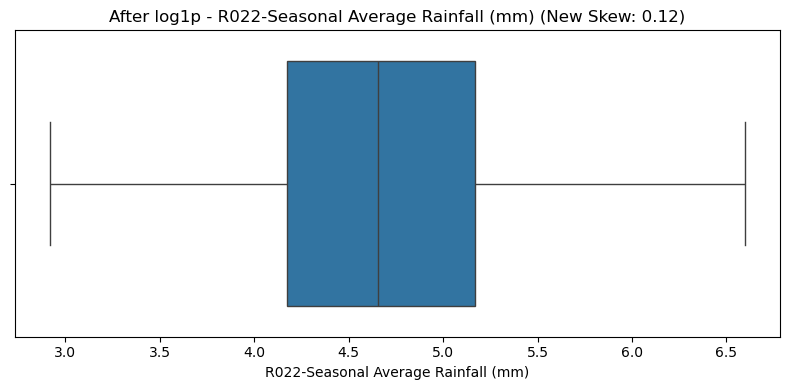

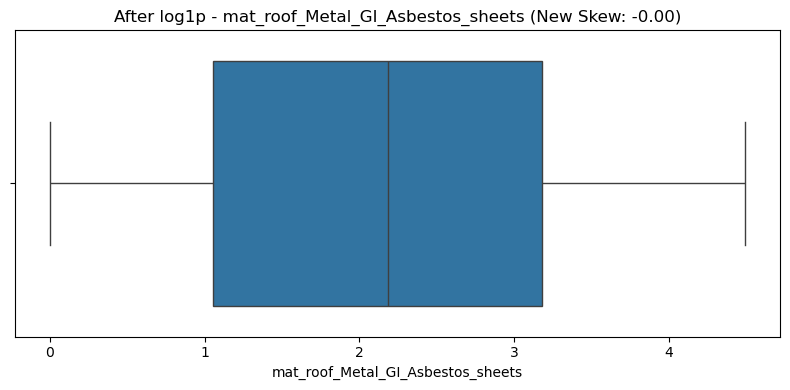

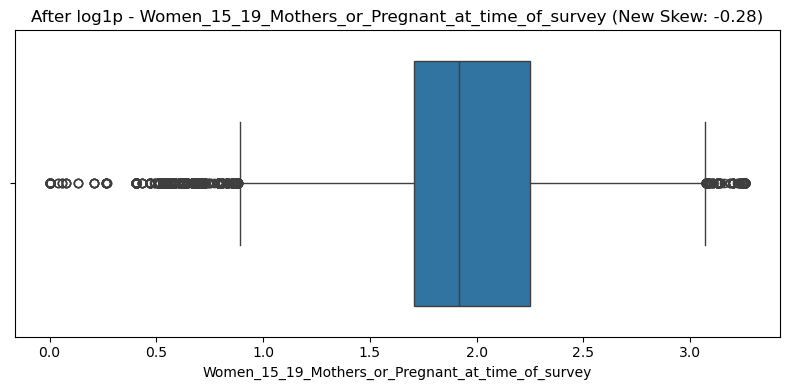

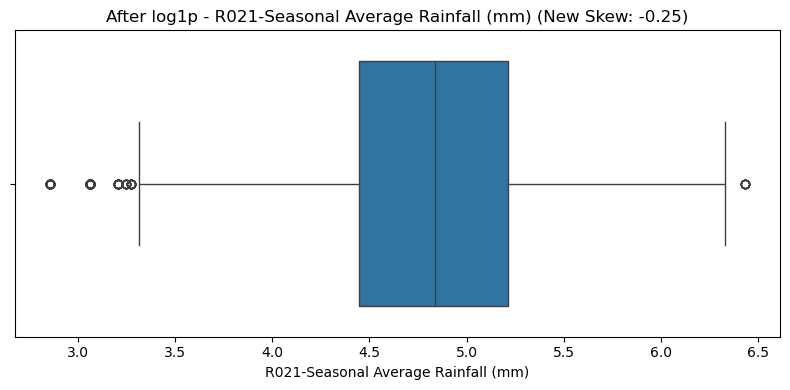

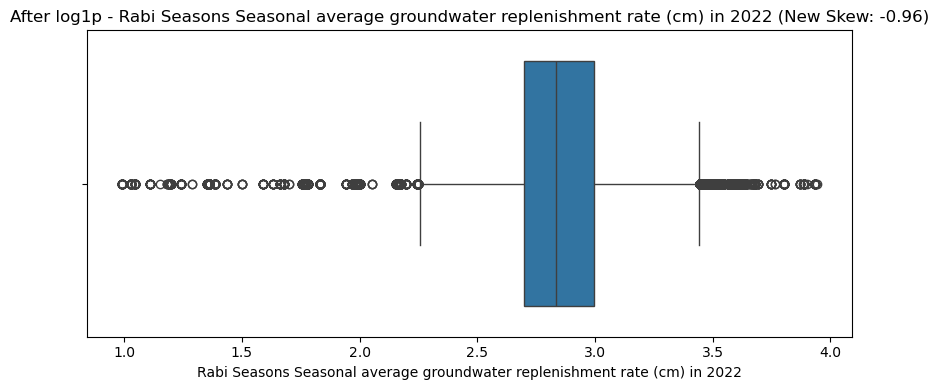

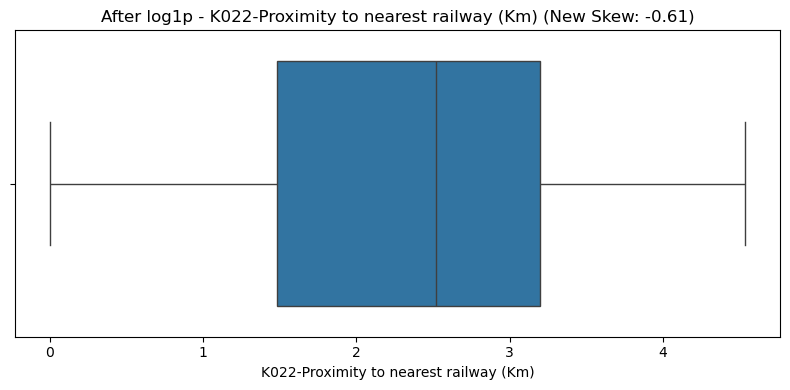

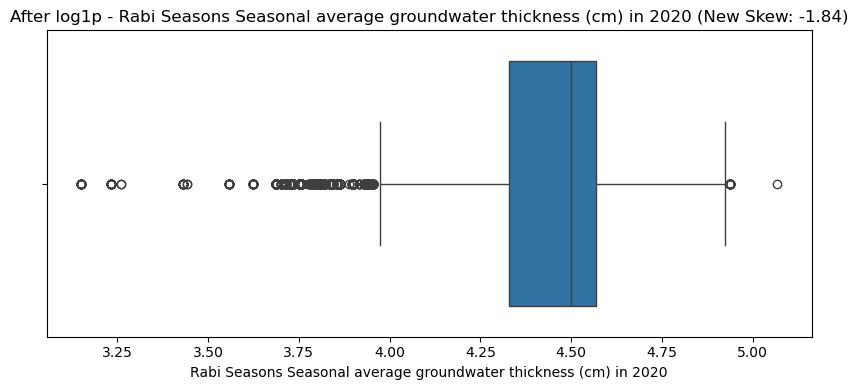

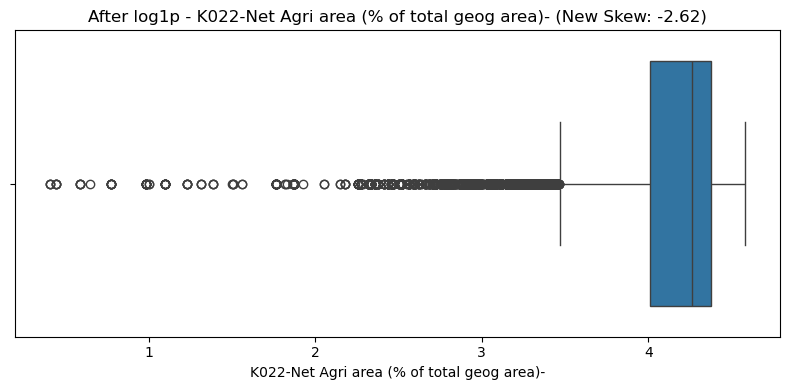

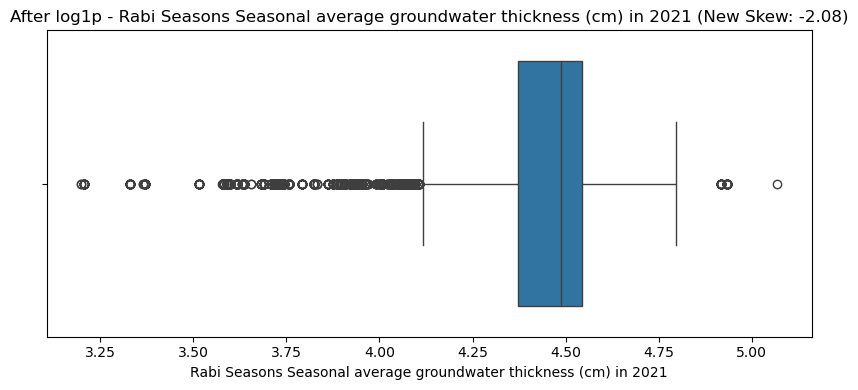

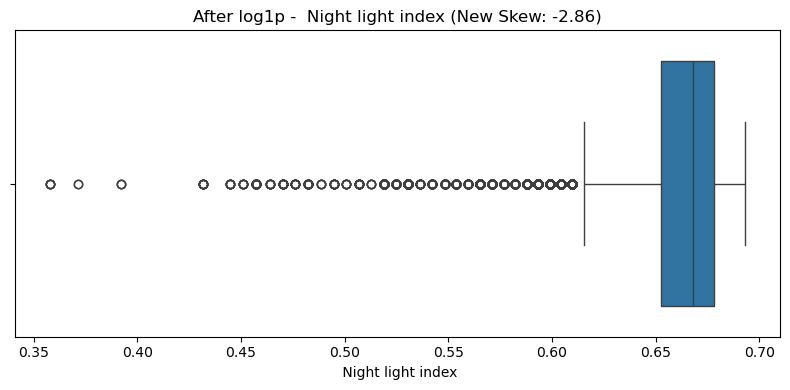

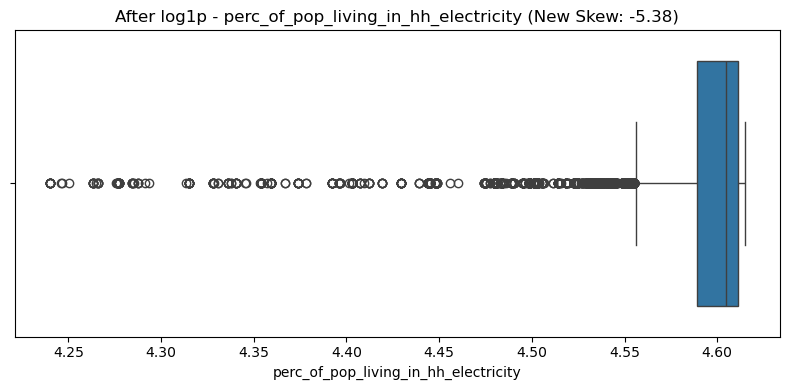

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load data
df = pd.read_csv("settled.csv")

# Step 2: Identify numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Step 3: Calculate skewness for all numeric columns
skewness = df[numeric_cols].skew().sort_values(ascending=False)

# Step 4: Print all skew values
print("\nSkewness of Numeric Columns:")
for col, val in skewness.items():
    print(f"{col:50s} : {val:.3f}")

# Step 5: Filter columns with |skewness| > 1
highly_skewed_cols = skewness[abs(skewness) > 1].index.tolist()
print(f"\nNumber of highly skewed columns: {len(highly_skewed_cols)}")
print("\nHighly skewed columns:\n", highly_skewed_cols)

# Step 6: Boxplots before transformation
print("\nBoxplots BEFORE log1p transformation:")
for col in highly_skewed_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Before log1p - {col} (Skew: {skewness[col]:.2f})")
    plt.tight_layout()
    plt.show()

# Step 7: Apply log1p transformation to highly skewed columns
for col in highly_skewed_cols:
    df[col] = np.log1p(df[col])

# Step 8: Recalculate skewness after log1p
post_skewness = df[highly_skewed_cols].skew().sort_values(ascending=False)

# Step 9: Show new skew values
print("\nSkewness AFTER log1p transformation:")
for col, val in post_skewness.items():
    print(f"{col:50s} : {val:.3f}")

# Step 10: Boxplots after transformation
print("\nBoxplots AFTER log1p transformation:")
for col in highly_skewed_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"After log1p - {col} (New Skew: {post_skewness[col]:.2f})")
    plt.tight_layout()
    plt.show()


In [50]:
df

,FarmerID,State,REGION,SEX,CITY,Zipcode,DISTRICT,VILLAGE,MARITAL_STATUS,Location,...,Rabi Seasons Agro Ecological Sub Zone in 2020,Rabi Seasons Seasonal average groundwater thickness (cm) in 2020,Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020,Night light index,Village score based on socio-economic parameters (Non normalised),Village score based on socio-economic parameters (0 to 100),"Village category based on socio-economic parameters (Good, Average, Poor)",Land Holding Index source (Total Agri Area/ no of people),Road density (Km/ SqKm),Target_Variable/Total Income
0,1032447758966470,MADHYA PRADESH,CENTRAL,M,VIDISHA,464001,VIDISHA,Ambar,M,"23.5131479,77.8207876",...,CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,4.624482,25.95,0.667829,22.33,33.45,Poor,1.085189,0.000000,13.592368
1,1041885888252080,MADHYA PRADESH,CENTRAL,M,PIPARIYA,461775,HOSHANGABAD,Khapar Kheda,M,"22.7184042,78.2180971",...,CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,4.426044,22.76,0.662688,27.94,42.54,Average,0.392042,1.587192,13.458837
2,1068465784357340,ODISHA,EAST,M,RAMGARH,754022,CUTTACK,Karanji,S,"20.649898,85.9164129",...,DECCAN PLATU HOT SEMI-ARID ECO-REGION,4.531739,17.60,0.667829,26.98,40.98,Poor,0.292670,0.000000,14.074022
3,1072440196043140,MADHYA PRADESH,CENTRAL,M,PIPARIYA,461775,HOSHANGABAD,Pondi,M,"22.7472362,78.3550004",...,CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,4.583436,19.01,0.657520,24.97,37.73,Poor,0.300105,0.000000,13.592368
4,1073642021022590,MADHYA PRADESH,CENTRAL,M,ASHOKNAGAR,473330,ASHOKNAGAR,Amoda,M,"24.8491952,77.6157991",...,CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,4.550397,19.70,0.647103,29.20,44.58,Average,0.598837,0.000000,13.527830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30935,5104007092416990,KARNATAKA,SOUTH,M,ARKALGUD,573102,HASSAN,Honnavalli,S,"12.772023,76.081301",...,EASTERN GHATS AND TAMIL NADU UPLANDS AND DECCA...,4.674043,40.54,0.662688,29.98,45.85,Average,0.104360,1.172482,13.997833
30936,3310239751166600,KARNATAKA,SOUTH,M,ARKALGUD,573130,HASSAN,Mallappanahalli,S,"12.6688679,75.9561366",...,EASTERN GHATS AND TAMIL NADU UPLANDS AND DECCA...,4.488636,17.92,0.672944,24.11,36.33,Poor,0.582216,2.319442,14.077876
30937,3574921768222110,KARNATAKA,SOUTH,M,HASSAN,573120,HASSAN,Nygere,M,"12.9956765,76.0817159",...,EASTERN GHATS AND TAMIL NADU UPLANDS AND DECCA...,4.674043,40.54,0.662688,29.78,45.51,Average,0.131028,1.378766,13.592368
30938,2877092990946190,KARNATAKA,SOUTH,M,ARSIKERE,573162,HASSAN,Rangenahalli,M,"13.2051248,76.168746",...,EASTERN GHATS AND TAMIL NADU UPLANDS AND DECCA...,4.488636,17.92,0.672944,21.25,31.70,Poor,0.548121,2.074429,14.062371


In [51]:
numeric_col=df.describe().columns

In [52]:
for col in numeric_col:
    print (col)

FarmerID
Zipcode
No_of_Active_Loan_In_Bureau
Avg_Disbursement_Amount_Bureau
Non_Agriculture_Income
Total_Land_For_Agriculture
K022-Proximity to nearest mandi (Km)
K022-Proximity to nearest railway (Km)
KO22-Village score based on socio-economic parameters (0 to 100)
K022-Seasonal Average Rainfall (mm)
R022-Seasonal Average Rainfall (mm)
K021-Seasonal Average Rainfall (mm)
R021-Seasonal Average Rainfall (mm)
R020-Seasonal Average Rainfall (mm)
Perc_of_house_with_6plus_room
Women_15_19_Mothers_or_Pregnant_at_time_of_survey
perc_of_pop_living_in_hh_electricity
perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms
mat_roof_Metal_GI_Asbestos_sheets
perc_of_Wall_material_with_Burnt_brick
Households_with_improved_Sanitation_Facility
perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k
K022-Total Geographical Area (in Hectares)-
K022-Net Agri area (in Ha)-
K022-Net Agri area (% of total geog area)-
Kharif Seasons  Irrigated area in 2022
Kharif Seasons  Cropping density in 2022
Kh

In [53]:
corr_matrix = df.select_dtypes(include='number').corr().abs()

In [54]:
target_col = 'Target_Variable/Total Income'  # change if needed
target_corr = corr_matrix[target_col].drop(target_col)
target_corr

FarmerID                                                              0.001550
Zipcode                                                               0.011329
No_of_Active_Loan_In_Bureau                                           0.032101
Avg_Disbursement_Amount_Bureau                                        0.097185
Non_Agriculture_Income                                                0.067279
                                                                        ...   
 Night light index                                                    0.057921
 Village score based on socio-economic parameters (Non normalised)    0.055183
 Village score based on socio-economic parameters (0 to 100)          0.055201
 Land Holding Index source (Total Agri Area/ no of people)            0.055709
 Road density (Km/ SqKm)                                              0.120073
Name: Target_Variable/Total Income, Length: 66, dtype: float64

In [55]:
# Upper triangle to avoid duplicate pairs
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Pairs with correlation above threshold (e.g., 0.85)
high_corr_pairs = [
    (col1, col2) for col1 in upper.columns
    for col2 in upper.index
    if upper.loc[col2, col1] > 0.85
]


In [56]:
to_drop = set()

for col1, col2 in high_corr_pairs:
    if target_corr.get(col1, 0) >= target_corr.get(col2, 0):
        to_drop.add(col2)
    else:
        to_drop.add(col1)


In [57]:
# Filter only the columns that are present in df
to_drop_existing = [col for col in to_drop if col in df.columns]

# Drop them safely
df_reduced = df.drop(columns=to_drop_existing)
print(f"Dropped {len(to_drop_existing)} columns out of {len(to_drop)} originally identified.")



Dropped 14 columns out of 14 originally identified.


In [58]:
df_reduced.columns

Index(['FarmerID', 'State', 'REGION', 'SEX', 'CITY', 'Zipcode', 'DISTRICT',
       'VILLAGE', 'MARITAL_STATUS', 'Location', 'Address type', 'Ownership',
       'No_of_Active_Loan_In_Bureau', 'Avg_Disbursement_Amount_Bureau',
       'Non_Agriculture_Income', 'Total_Land_For_Agriculture',
       'K022-Village category based on Agri parameters (Good, Average, Poor)',
       'K022-Nearest Mandi Name', 'K022-Proximity to nearest railway (Km)',
       'KO22-Village score based on socio-economic parameters (0 to 100)',
       'K022-Village category based on socio-economic parameters (Good, Average, Poor)',
       'K022-Seasonal Average Rainfall (mm)',
       'K022-Ambient temperature (min & max)',
       'R022-Village category based on Agri parameters (Good, Average, Poor)',
       'R022-Seasonal Average Rainfall (mm)',
       'R022-Ambient temperature (min & max)',
       'K021-Seasonal Average Rainfall (mm)',
       'K021-Ambient temperature (min & max)',
       'R021-Seasonal Average Rainf

In [59]:
df_reduced.head()

,FarmerID,State,REGION,SEX,CITY,Zipcode,DISTRICT,VILLAGE,MARITAL_STATUS,Location,...,Rabi Seasons Agricultural Score in 2020,Rabi Seasons Type of soil in 2020,Rabi Seasons Type of water bodies in hectares 2020,Rabi Seasons Agro Ecological Sub Zone in 2020,Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020,Night light index,"Village category based on socio-economic parameters (Good, Average, Poor)",Land Holding Index source (Total Agri Area/ no of people),Road density (Km/ SqKm),Target_Variable/Total Income
0,1032447758966470,MADHYA PRADESH,CENTRAL,M,VIDISHA,464001,VIDISHA,Ambar,M,"23.5131479,77.8207876",...,30.71,Deep Black soils (with shallow and medium Blac...,[None],CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,25.95,0.667829,Poor,1.085189,0.000000,13.592368
1,1041885888252080,MADHYA PRADESH,CENTRAL,M,PIPARIYA,461775,HOSHANGABAD,Khapar Kheda,M,"22.7184042,78.2180971",...,28.74,Deep Black soils (with shallow and medium Blac...,[None],CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,22.76,0.662688,Average,0.392042,1.587192,13.458837
2,1068465784357340,ODISHA,EAST,M,RAMGARH,754022,CUTTACK,Karanji,S,"20.649898,85.9164129",...,31.42,Shallow Black Soils (with medium and deep Blac...,[None],DECCAN PLATU HOT SEMI-ARID ECO-REGION,17.60,0.667829,Poor,0.292670,0.000000,14.074022
3,1072440196043140,MADHYA PRADESH,CENTRAL,M,PIPARIYA,461775,HOSHANGABAD,Pondi,M,"22.7472362,78.3550004",...,27.61,Deep Black soils (with shallow and medium Blac...,[None],CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,19.01,0.657520,Poor,0.300105,0.000000,13.592368
4,1073642021022590,MADHYA PRADESH,CENTRAL,M,ASHOKNAGAR,473330,ASHOKNAGAR,Amoda,M,"24.8491952,77.6157991",...,26.36,Deep Black soils (with shallow and medium Blac...,[None],CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,19.70,0.647103,Average,0.598837,0.000000,13.527830


In [60]:
!pip install shap xgboost


Top 30 Features by SHAP Importance:
                                               feature  mean_abs_shap
6                                            DISTRICT       0.149384
9                                            Location       0.111734
15                         Total_Land_For_Agriculture       0.086176
14                             Non_Agriculture_Income       0.074821
7                                             VILLAGE       0.022401
4                                                CITY       0.020137
1                                               State       0.008683
3                                                 SEX       0.003480
17                            K022-Nearest Mandi Name       0.002798
25               R022-Ambient temperature (min & max)       0.001551
22               K022-Ambient temperature (min & max)       0.001327
29               R021-Ambient temperature (min & max)       0.001006
31               R020-Ambient temperature (min & max)       0.0005

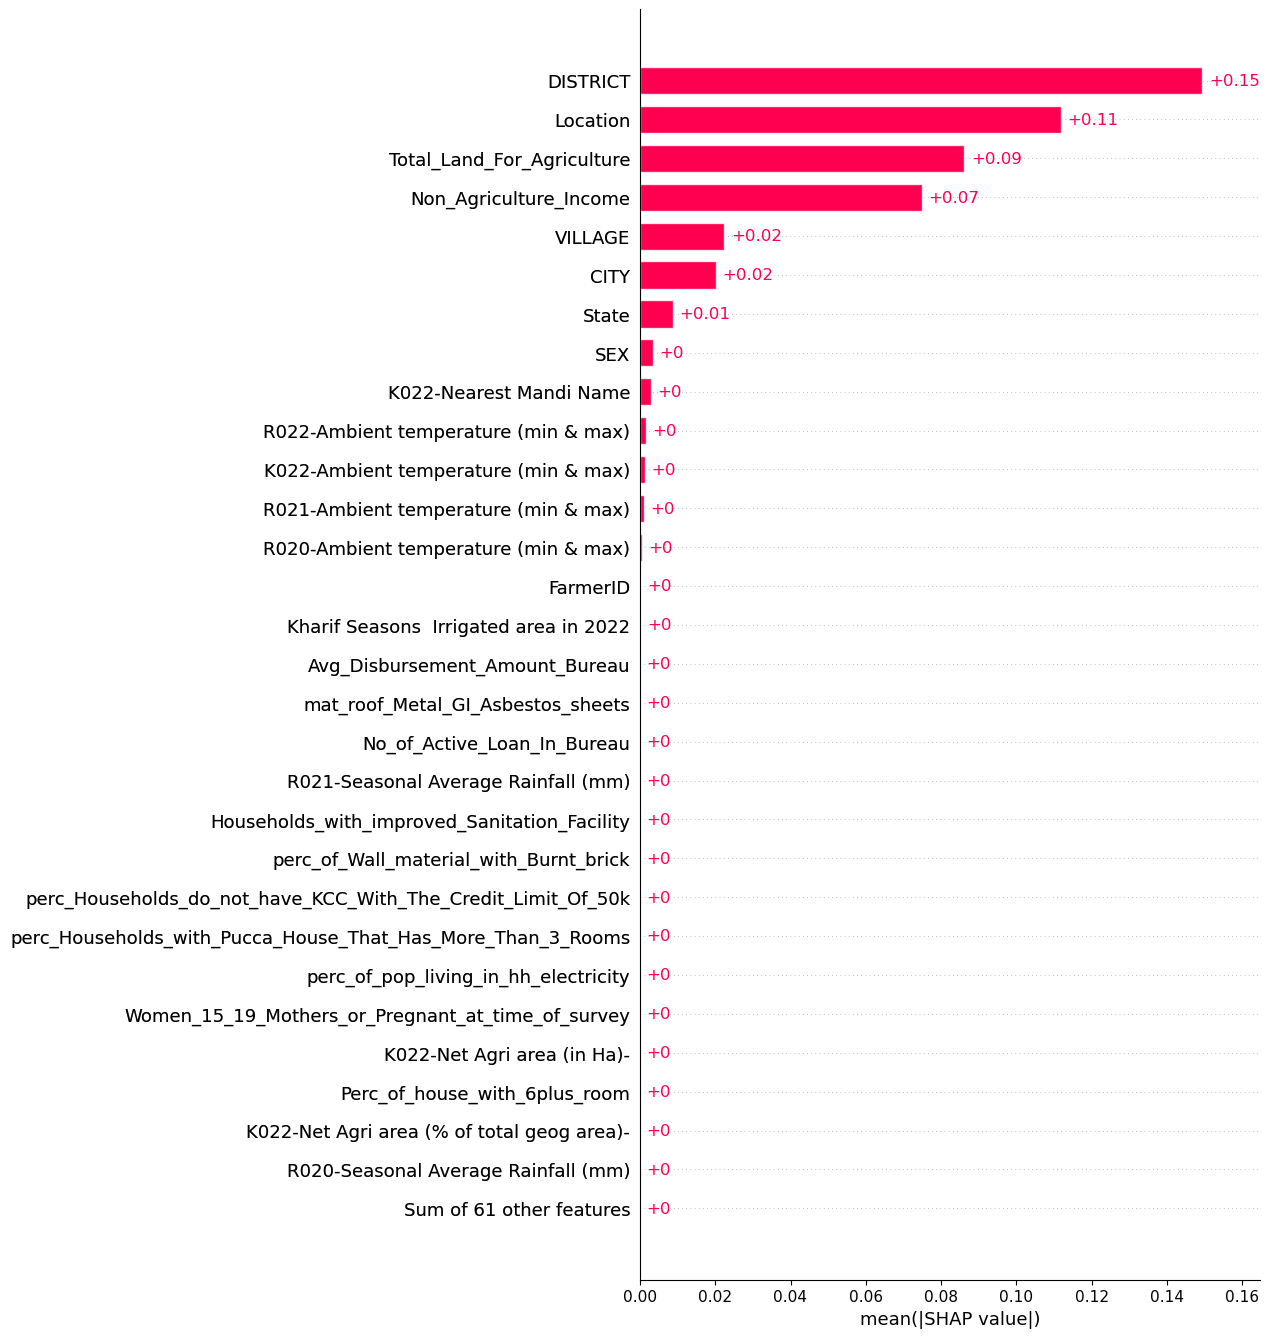

In [61]:
# Step 1: Imports
import shap
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Step 2: Prepare data
df = df_reduced.copy()

# Drop rows where target is NaN
df = df.dropna(subset=['Target_Variable/Total Income'])

# Separate features and target
X = df.drop(columns=['Target_Variable/Total Income'])
y = df['Target_Variable/Total Income']

# Step 3: Convert object columns to category or drop
object_cols = X.select_dtypes(include='object').columns

# Option A: Convert to category
for col in object_cols:
    X[col] = X[col].astype('category')

# Optional: Alternatively, you could drop these columns instead of converting

# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train XGBoost model
model = XGBRegressor(enable_categorical=True, random_state=42)
model.fit(X_train, y_train)

# Step 6: SHAP Explainer
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# Step 7: Get mean absolute SHAP values for each feature
shap_sum = np.abs(shap_values.values).mean(axis=0)
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'mean_abs_shap': shap_sum
}).sort_values(by='mean_abs_shap', ascending=False)

# Step 8: Print Top 30 features
top_30 = importance_df.head(30)
print("Top 30 Features by SHAP Importance:\n", top_30)

# Step 9: (Optional) SHAP Summary Plot
shap.plots.bar(shap_values, max_display=30)


In [62]:
# Keep only features with non-zero importance
important_features = top_30[top_30['mean_abs_shap'] > 0]['feature'].tolist()
X_reduced = X[important_features]


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

model = XGBRegressor(enable_categorical=True, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R² Score with SHAP Top Features: {r2:.4f}")


R² Score with SHAP Top Features: 0.5144


In [64]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.4f}")
print(f"MAPE (%): {mape * 100:.2f}%")


MAPE: 0.0166
MAPE (%): 1.66%


In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error

# STEP 1: Define your DataFrame and target
df = df_reduced.copy()
target_col = 'Target_Variable/Total Income'

# STEP 2: Identify non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
non_numeric_cols = [col for col in non_numeric_cols if col != target_col]

# STEP 3: Drop rows with NaN in target
df = df.dropna(subset=[target_col])

# STEP 4: SHAP-based top 30 features (manually provide based on your output)
top_30_features = [
    'DISTRICT', 'Location', 'Total_Land_For_Agriculture', 'Non_Agriculture_Income',
    'VILLAGE', 'CITY', 'State', 'SEX', 'K022-Nearest Mandi Name',
    'R022-Ambient temperature (min & max)', 'K022-Ambient temperature (min & max)',
    'R021-Ambient temperature (min & max)', 'R020-Ambient temperature (min & max)',
    'FarmerID', 'Kharif Seasons  Irrigated area in 2022',
    'Avg_Disbursement_Amount_Bureau', 'mat_roof_Metal_GI_Asbestos_sheets',
    'No_of_Active_Loan_In_Bureau'
    # Add other important features up to 30 based on your SHAP output
]

# Filter features that exist in the DataFrame
top_30_features = [col for col in top_30_features if col in df.columns]

# STEP 5: Subset the data
X = df[top_30_features]
y = df[target_col]

# STEP 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 7: Encode non-numeric columns with OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
non_numeric_in_top30 = [col for col in non_numeric_cols if col in top_30_features]

if non_numeric_in_top30:
    X_train[non_numeric_in_top30] = encoder.fit_transform(X_train[non_numeric_in_top30])
    X_test[non_numeric_in_top30] = encoder.transform(X_test[non_numeric_in_top30])

# STEP 8: Train XGBoost
model = XGBRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# STEP 9: Predict and calculate MAPE
y_pred = model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.4f}")
print(f"MAPE (%): {mape * 100:.2f}%")


MAPE: 0.0225
MAPE (%): 2.25%


In [66]:
!pip install catboost


✅ Top 30 Features by SHAP Importance:

                                              feature  mean_abs_shap
15                         Total_Land_For_Agriculture       0.093373
14                             Non_Agriculture_Income       0.083288
6                                            DISTRICT       0.067918
9                                            Location       0.049687
1                                               State       0.049291
10                                       Address type       0.022282
4                                                CITY       0.019334
3                                                 SEX       0.016709
7                                             VILLAGE       0.010104
2                                              REGION       0.009901
11                                          Ownership       0.008227
36                  mat_roof_Metal_GI_Asbestos_sheets       0.006919
77    Kharif Seasons Agro Ecological Sub Zone in 2020       0.00

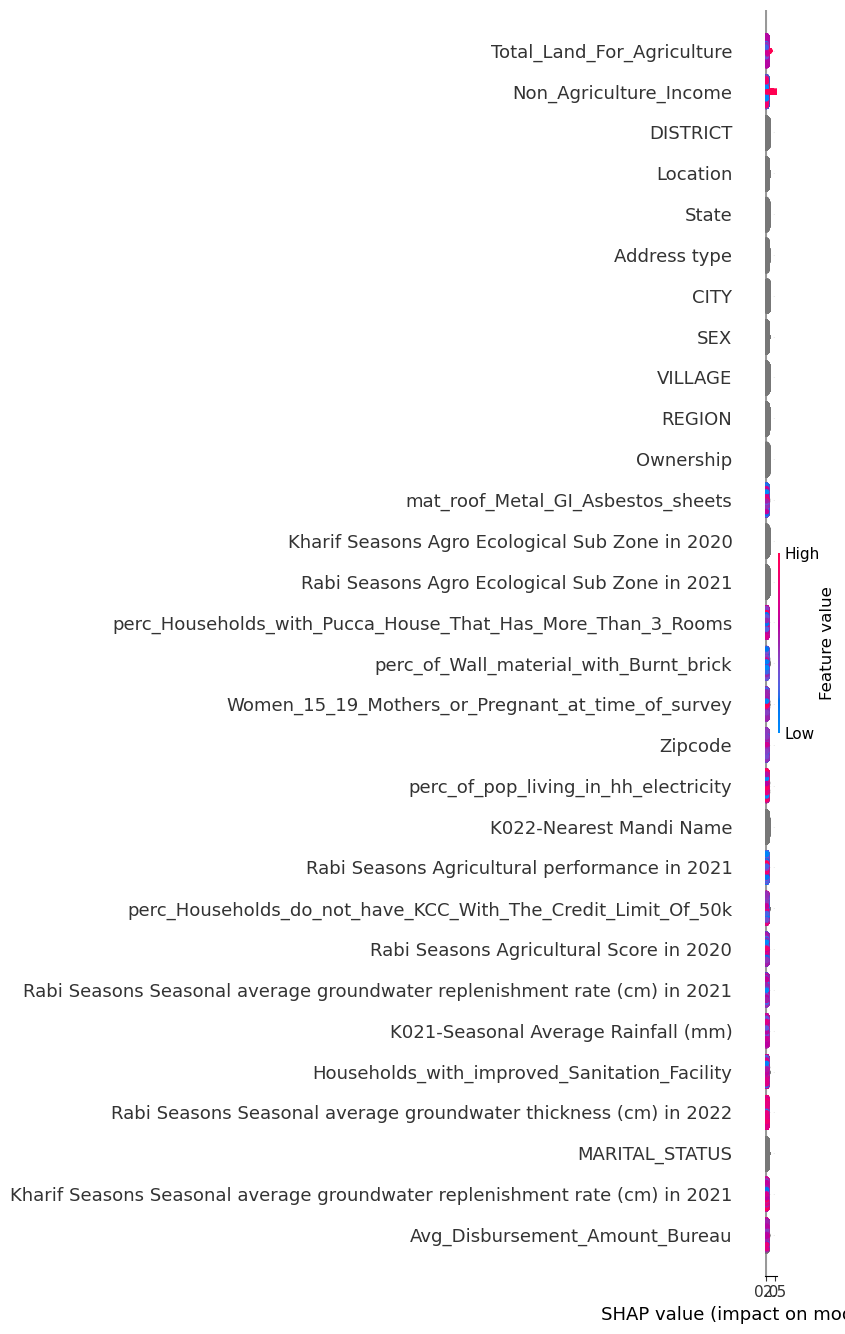

In [67]:
import pandas as pd
import shap
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split

# --- Step 1: Define Data ---
df = df_reduced.copy()
target_col = 'Target_Variable/Total Income'

# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify categorical columns (non-numeric)
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# --- Step 2: Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Step 3: Create CatBoost Pool with Categorical Columns ---
train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_cols)
test_pool = Pool(data=X_test, label=y_test, cat_features=categorical_cols)

# --- Step 4: Fit CatBoost Regressor ---
model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    verbose=0,
    random_seed=42
)
model.fit(train_pool)

# --- Step 5: SHAP Explainer ---
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# --- Step 6: Compute SHAP Importance (mean absolute value per feature) ---
shap_importance = pd.DataFrame({
    'feature': X_train.columns,
    'mean_abs_shap': np.abs(shap_values).mean(axis=0)
}).sort_values(by='mean_abs_shap', ascending=False)

# --- Step 7: View Top 30 Features ---
top_30 = shap_importance.head(30)
print("✅ Top 30 Features by SHAP Importance:\n")
print(top_30)

# Optional: SHAP summary plot
shap.summary_plot(shap_values, X_train, max_display=30)


In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from xgboost import XGBRegressor

# Copying original df
df = df_reduced.copy()

# ✅ Corrected list of top 30 SHAP features
top_30_features = [
    'Total_Land_For_Agriculture',
    'Non_Agriculture_Income',
    'DISTRICT',
    'Location',
    'State',
    'Address type',
    'CITY',
    'SEX',
    'VILLAGE',
    'REGION',
    'Ownership',
    'mat_roof_Metal_GI_Asbestos_sheets',
    'Kharif Seasons Agro Ecological Sub Zone in 2020',
    'Rabi Seasons Agro Ecological Sub Zone in 2021',
    'perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms',
    'perc_of_Wall_material_with_Burnt_brick',
    'Women_15_19_Mothers_or_Pregnant_at_time_of_survey',
    'Zipcode',
    'perc_of_pop_living_in_hh_electricity',
    'K022-Nearest Mandi Name',
    'Rabi Seasons Agricultural performance in 2021',
    'perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k',
    'Rabi Seasons Agricultural Score in 2020',
    'Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2021',
    'K021-Seasonal Average Rainfall (mm)',
    'Households_with_improved_Sanitation_Facility',
    'MARITAL_STATUS','Avg_Disbursement_Amount_Bureau'
    
]

# Target variable
target = 'Target_Variable/Total Income'

# Drop rows with missing values
df_model = df[top_30_features + [target]].dropna()

# Split X and y
X = df_model[top_30_features]
y = df_model[target]

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object', 'category']).columns.tolist()

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess with OneHotEncoding for categoricals
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)

# Fit and transform the data
X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc = preprocessor.transform(X_test)

# Train XGBoost Regressor
model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train_enc, y_train)

# Make predictions
y_pred = model.predict(X_test_enc)

# Evaluate the model
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"MAPE: {mape:.4f}")
print(f"MAPE (%): {mape * 100:.2f}%")
print(f"R² Score: {r2:.4f}")


MAPE: 0.0163
MAPE (%): 1.63%
R² Score: 0.5758
